<a href="https://colab.research.google.com/github/Mazwan98/dicoding/blob/main/Proyek_Analisis_Data_E_Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis Project [E-Commerce Public Dataset]
- Name: Ady Syamsuri
- Email: ady.business17@gmail.com
- Id Dicoding: ady_syamsuri_m467b4k

## Defining Business Questions

- Which products are the most and least sold?
- What is the total amount spent by customers in recent months?
- What is the sales trend on our e-commerce platform over time?
- What is the level of customer satisfaction with our services?
- What is the demographic profile of our customers, and are there any differences in purchase preferences among different groups?
- In which geographic regions do we have the highest number of customers?


## Install and Import all the required libraries

In [12]:
# Importing necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For handling dataframes and data processing
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For advanced data visualizations
import urllib  # For handling URL-related tasks
!pip install unidecode  # Install unidecode library if not already installed
import unidecode  # For removing accents and converting to ASCII
import matplotlib.image as mpimg  # For displaying images in visualizations

## Data Wrangling

### Gathering Data

In [124]:
# Loading the customer dataset into a pandas DataFrame
file_path = '/content/customers_dataset.csv'  # Define the file path for the dataset
customers_df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame

# Display the first few rows of the dataset for an initial view
customers_df.head()  # Preview the first 5 rows of the dataset

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [16]:
# Loading the customer dataset into a pandas DataFrame
file_path = '/content/geolocation_dataset.csv'  # Define the file path for the dataset
geolocation_df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame

# Display the first few rows of the dataset for an initial view
geolocation_df.head()  # Preview the first 5 rows of the dataset

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [17]:
# Loading the customer dataset into a pandas DataFrame
file_path = '/content/order_items_dataset.csv'  # Define the file path for the dataset
order_items = pd.read_csv(file_path)  # Read the CSV file into a DataFrame

# Display the first few rows of the dataset for an initial view
order_items.head()  # Preview the first 5 rows of the dataset

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [18]:
# Loading the customer dataset into a pandas DataFrame
file_path = '/content/order_payments_dataset.csv'  # Define the file path for the dataset
order_payments = pd.read_csv(file_path)  # Read the CSV file into a DataFrame

# Display the first few rows of the dataset for an initial view
order_payments.head()  # Preview the first 5 rows of the dataset

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [20]:
order_reviews = pd.read_csv('/content/order_reviews_dataset.csv')
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [23]:
# Loading the customer dataset into a pandas DataFrame
file_path = '/content/orders_dataset.csv'  # Define the file path for the dataset
orders_df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame

# Display the first few rows of the dataset for an initial view
orders_df.head()  # Preview the first 5 rows of the dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [25]:
# Loading the customer dataset into a pandas DataFrame
file_path = '/content/product_category_name_translation.csv'  # Define the file path for the dataset
product_category = pd.read_csv(file_path)  # Read the CSV file into a DataFrame

# Display the first few rows of the dataset for an initial view
product_category.head()  # Preview the first 5 rows of the dataset

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [26]:
# Loading the customer dataset into a pandas DataFrame
file_path = '/content/products_dataset.csv'  # Define the file path for the dataset
products_df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame

# Display the first few rows of the dataset for an initial view
products_df.head()  # Preview the first 5 rows of the dataset

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [27]:
# Loading the customer dataset into a pandas DataFrame
file_path = '/content/sellers_dataset.csv'  # Define the file path for the dataset
sellers_df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame

# Display the first few rows of the dataset for an initial view
sellers_df.head()  # Preview the first 5 rows of the dataset

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data


In [28]:
# Display basic info for each DataFrame to understand the structure, data types, and non-null count

# Customer DataFrame info
print('\n', customers_df.info())

# Geolocation DataFrame info (renamed from geo to geolocation)
print('\n', geolocation_df.info())

# Order items DataFrame info
print('\n', order_items.info())

# Order payments DataFrame info (renamed from order_pay to order_payments)
print('\n', order_payments.info())

# Order reviews DataFrame info (renamed from order_rev to order_reviews)
print('\n', order_reviews.info())

# Orders DataFrame info
print('\n', orders_df.info())

# Product category DataFrame info (renamed from product_cat to product_category)
print('\n', product_category.info())

# Products DataFrame info
print('\n', products_df.info())

# Sellers DataFrame info
print('\n', sellers_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non

In [29]:
# Checking for null values in all DataFrames to identify any missing data that may need cleaning

# Checking null values in customers DataFrame
print('\nInfo data null customers:\n', customers_df.isnull().sum())

# Checking null values in geolocation DataFrame (renamed from geo to geolocation_df)
print('\nInfo data null geolocation:\n', geolocation_df.isnull().sum())

# Checking null values in order items DataFrame
print('\nInfo data null order items:\n', order_items.isnull().sum())

# Checking null values in order payments DataFrame (renamed from order_pay to order_payments)
print('\nInfo data null order payments:\n', order_payments.isnull().sum())

# Checking null values in order reviews DataFrame (renamed from order_rev to order_reviews)
print('\nInfo data null order reviews:\n', order_reviews.isnull().sum())

# Checking null values in orders DataFrame
print('\nInfo data null orders:\n', orders_df.isnull().sum())

# Checking null values in product category DataFrame (renamed from product_cat to product_category)
print('\nInfo data null product category:\n', product_category.isnull().sum())

# Checking null values in products DataFrame
print('\nInfo data null products:\n', products_df.isnull().sum())

# Checking null values in sellers DataFrame
print('\nInfo data null sellers:\n', sellers_df.isnull().sum())


Info data null customers:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Info data null geolocation:
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Info data null order items:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Info data null order payments:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Info data null order reviews:
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_cre

In [30]:
# Checking for duplicate entries in each DataFrame to ensure data integrity

# Checking for duplicate entries in the customers DataFrame
print('Duplicate data count in customers:', customers_df.duplicated().sum())

# Checking for duplicate entries in the geolocation DataFrame (renamed from geo to geolocation_df)
print('Duplicate data count in geolocation:', geolocation_df.duplicated().sum())

# Checking for duplicate entries in the order items DataFrame
print('Duplicate data count in order items:', order_items.duplicated().sum())

# Checking for duplicate entries in the order payments DataFrame (renamed from order_pay to order_payments)
print('Duplicate data count in order payments:', order_payments.duplicated().sum())

# Checking for duplicate entries in the order reviews DataFrame (renamed from order_rev to order_reviews)
print('Duplicate data count in order reviews:', order_reviews.duplicated().sum())

# Checking for duplicate entries in the orders DataFrame
print('Duplicate data count in orders:', orders_df.duplicated().sum())

# Checking for duplicate entries in the product category DataFrame (renamed from product_cat to product_category)
print('Duplicate data count in product category:', product_category.duplicated().sum())

# Checking for duplicate entries in the products DataFrame
print('Duplicate data count in products:', products_df.duplicated().sum())

# Checking for duplicate entries in the sellers DataFrame
print('Duplicate data count in sellers:', sellers_df.duplicated().sum())

Duplicate data count in customers: 0
Duplicate data count in geolocation: 261831
Duplicate data count in order items: 0
Duplicate data count in order payments: 0
Duplicate data count in order reviews: 0
Duplicate data count in orders: 0
Duplicate data count in product category: 0
Duplicate data count in products: 0
Duplicate data count in sellers: 0


In [31]:
# Generating descriptive statistics for each DataFrame to summarize key metrics

# Displaying descriptive statistics for the customers DataFrame
print('\nDescriptive statistics for customers:\n', customers_df.describe(include='all'))

# Displaying descriptive statistics for the geolocation DataFrame (renamed from geo to geolocation_df)
print('\nDescriptive statistics for geolocation:\n', geolocation_df.describe(include='all'))

# Displaying descriptive statistics for the order items DataFrame
print('\nDescriptive statistics for order items:\n', order_items.describe(include='all'))

# Displaying descriptive statistics for the order payments DataFrame (renamed from order_pay to order_payments)
print('\nDescriptive statistics for order payments:\n', order_payments.describe(include='all'))

# Displaying descriptive statistics for the order reviews DataFrame (renamed from order_rev to order_reviews)
print('\nDescriptive statistics for order reviews:\n', order_reviews.describe(include='all'))

# Displaying descriptive statistics for the orders DataFrame
print('\nDescriptive statistics for orders:\n', orders_df.describe(include='all'))

# Displaying descriptive statistics for the product category DataFrame (renamed from product_cat to product_category)
print('\nDescriptive statistics for product category:\n', product_category.describe(include='all'))

# Displaying descriptive statistics for the products DataFrame
print('\nDescriptive statistics for products:\n', products_df.describe(include='all'))

# Displaying descriptive statistics for the sellers DataFrame
print('\nDescriptive statistics for sellers:\n', sellers_df.describe(include='all'))



Descriptive statistics for customers:
                              customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_co

In [32]:
# Displaying information about the geolocation DataFrame, including the number of entries, column names, non-null counts, and data types
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


### Cleaning Data

In [33]:
# Filtering the order_reviews DataFrame to display rows where the review_comment_title is missing (NaN)
order_reviews[order_reviews.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [34]:
# Counting the occurrences of each unique value in the review_comment_title column
order_reviews.review_comment_title.value_counts()

,count
review_comment_title,
Recomendo,423
recomendo,345
Bom,293
super recomendo,270
Excelente,248
...,...
Luminaria sobrepor led 18,1
Não recebi.,1
produto com lacre violado,1


In [35]:
# Filtering the order_reviews DataFrame to find rows with missing review_comment_message
order_reviews[order_reviews.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [36]:
# Counting the occurrences of each unique review_comment_message in the order_reviews DataFrame
order_reviews.review_comment_message.value_counts()

,count
review_comment_message,
Muito bom,230
Bom,189
muito bom,122
bom,107
Recomendo,100
...,...
PRODUTO FOI ENTREGUE VIA CORREIOS\r\nANTES DO PRAZO PREVISTO.,1
"Devido incompatibilidade vou devolver, ótimo produto!",1
Infelizmente não! A qualidade do produto não agradou.Impressão da foto em exposição remete a um tamanho maior e a recebida sequer atende a uma criança. PRODUTO NÃO JUSTIFICA O VALOR INFELIZMENTE!,1


In [37]:
# Replacing missing values in the review_comment column with "no comment"
order_reviews.fillna(value="no comment", inplace=True)

In [38]:
# Filtering rows in the orders DataFrame where the order_approved_at column is missing
orders_df[orders_df.order_approved_at.isna()]


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [39]:
# List of columns that contain datetime values which need to be converted to pandas datetime format.
datetime_oi = ["shipping_limit_date"]

# Loop through each column in the list and convert its values to pandas datetime format.
for column in datetime_oi:
    order_items[column] = pd.to_datetime(order_items[column])
    # Convert the column 'shipping_limit_date' from string or other formats to a pandas datetime object.
    # This allows for easier manipulation and analysis of dates, such as filtering, sorting, or calculating time differences.

In [40]:
# List of columns that contain datetime values, which need to be converted to pandas datetime format.
datetime_or = ["review_creation_date", "review_answer_timestamp"]

# Loop through each column in the list and convert its values to pandas datetime format.
for column in datetime_or:
    order_reviews[column] = pd.to_datetime(order_reviews[column])
    # Convert the columns 'review_creation_date' and 'review_answer_timestamp' from string or other formats
    # to pandas datetime objects, making it easier to manipulate and analyze date and time-related information.

In [41]:
# List of columns that contain datetime values, which need to be converted to pandas datetime format.
datetime_oo = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
               "order_delivered_customer_date", "order_estimated_delivery_date"]

# Loop through each column in the list and convert its values to pandas datetime format.
for column in datetime_oo:
    orders_df[column] = pd.to_datetime(orders_df[column])
    # Convert the specified columns to pandas datetime objects for easier manipulation and analysis.
    # These columns likely contain important timestamps such as order purchase, approval, and delivery dates.

In [42]:
order_items.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [43]:
order_reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [44]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


## Exploratory Data Analysis (EDA)

### Explore **customers_df**

In [45]:
customers_df.sample(5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
37595,708f92fedcdcc81215419faa0026b753,f36560435f28ce483a177d4b638427ad,8490,sao paulo,SP
94855,ce00c3e5cf8e6b1a53809d48f0d700b4,b69150b50acc3fb8cbd018d4cb9ae973,72899,jardim abc de goias,GO
61808,7173277fd224065c8b8100db8b2414bf,ed392bdb968739afcf1a11bd610a7886,23035,rio de janeiro,RJ
86938,b2dfb42b62eed0666aef0b9e660de51b,5c06277d20503caa9cb14e73fa109302,9400,ribeirao pires,SP
79356,3f0189de46eeeb99ba13da6c9bbd21c0,fc45ba6b423768eb78c83c19c664814f,48970,senhor do bonfim,BA


In [46]:
# generate descriptive statistics for the customers_df DataFrame in pandas.
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [47]:
# checks whether all entries in the customer_id column of the customers_df DataFrame are unique.
customers_df.customer_id.is_unique

True

In [48]:
# accesses the duplicated method of the customer_id column in the customers_df DataFrame without actually calling it (missing parentheses).
customers_df.customer_id.duplicated

<bound method Series.duplicated of 0        06b8999e2fba1a1fbc88172c00ba8bc7
1        18955e83d337fd6b2def6b18a428ac77
2        4e7b3e00288586ebd08712fdd0374a03
3        b2b6027bc5c5109e529d4dc6358b12c3
4        4f2d8ab171c80ec8364f7c12e35b23ad
                       ...               
99436    17ddf5dd5d51696bb3d7c6291687be6f
99437    e7b71a9017aa05c9a7fd292d714858e8
99438    5e28dfe12db7fb50a4b2f691faecea5e
99439    56b18e2166679b8a959d72dd06da27f9
99440    274fa6071e5e17fe303b9748641082c8
Name: customer_id, Length: 99441, dtype: object>

In [49]:
# Group the 'customers_df' DataFrame by the 'customer_city' column and count the unique 'customer_id' for each city.
# The result will be the number of distinct customers in each city.
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)
# Sort the result in descending order to display the cities with the most unique customers first.
# The output will show the cities with the highest number of unique customers at the top.

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [50]:
# Group the 'customers_df' DataFrame by the 'customer_state' column and count the unique 'customer_id' for each state.
# The result will be the number of distinct customers in each state.
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)
# Sort the result in descending order to display the states with the most unique customers first.
# The output will show the states with the highest number of unique customers at the top.

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


In [51]:
order_payments.sample(5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
99532,19d3484384a0e1eef23357b8c193bd86,1,credit_card,1,104.35
85761,e17fa68de8f9e0f07dd6dca946f9dd7f,1,credit_card,1,202.83
101811,1dfb3295da489ecc5423ea20e152094c,1,credit_card,10,146.05
85216,c86098909905caad95e52f3c49ed3b5a,1,credit_card,1,70.14
74791,c736ef293988efe25be44784ebd348f6,1,credit_card,4,80.81


In [52]:
order_payments.describe(include='all')


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [53]:
# Group the 'order_payments' DataFrame by the 'payment_type' column and count the unique 'order_id' for each payment type.
# This will give the number of distinct orders for each payment type (e.g., credit card, boleto, etc.).
order_payments.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)
# Sort the result in descending order to display the payment types with the most unique orders first.
# The output will show the payment methods with the highest number of unique orders at the top.

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


In [54]:
orders_df.sample(5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
55810,ba9a7c92052d9666424a1c3cc395a5fb,3d585c4e4914b64ce5ef202ed17795a0,delivered,2018-04-12 20:36:50,2018-04-12 20:49:12,2018-04-17 16:35:57,2018-05-10 18:33:13,2018-05-21
45135,4e6a80e9e0629461dbf8735ef09cf392,7ad350082deddef39b254d465520be10,delivered,2017-10-01 22:48:24,2017-10-03 16:24:45,2017-10-04 16:30:11,2017-10-26 12:53:19,2017-11-03
92134,be003b92657e12fe422a450aacc1eed7,ce4cb710ba906b8b905d1f9451f7797d,delivered,2018-08-05 21:20:52,2018-08-05 21:30:18,2018-08-06 13:13:00,2018-08-09 22:11:30,2018-08-17
1400,b5585a71d72133e35079e240c76065d8,28e1fb62850ddf7aebac7ec6602dc756,delivered,2017-11-22 21:29:06,2017-11-22 21:36:25,2017-11-23 22:02:42,2017-12-18 13:51:24,2017-12-12
81683,9fdcbf4559fdbe106a9d0a99db753858,97859d4bc3d358aacfedc0eed918be83,delivered,2017-10-26 21:55:59,2017-10-26 22:10:05,2017-10-27 16:13:14,2017-11-07 01:09:56,2017-11-14


In [55]:
# Calculate the delivery time for each order by subtracting the 'order_delivered_carrier_date'
# from the 'order_delivered_customer_date'. The result is a timedelta object representing
# the difference between the two timestamps. We then convert this timedelta into total seconds
# using the `total_seconds()` method.
# Finally, the total seconds are converted into days by dividing by 86400 (the number of seconds in a day),
# and we round the result to get an integer value. This rounded value is then stored in a new column
# 'delivery_time' in the `orders_df` DataFrame.

delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [56]:
orders_df.sample(5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
18883,923b32346120d8512fe32b6842bad3c1,b6b72958984ca6262d9ff5b54ed4d16f,delivered,2018-02-24 18:06:40,2018-02-25 18:07:48,2018-02-27 03:17:38,2018-04-09 19:41:50,2018-03-16,42.0
11812,f4bfb8dea9ecdb8ecff6f92691e8f45d,cd3cb8b79efc46cb1b80408d83834df1,delivered,2017-11-18 14:53:42,2017-11-18 15:15:25,2017-11-20 20:28:06,2017-11-24 19:36:54,2017-12-11,4.0
79989,3dcf6bbf1ee3961f91de6a7c6e51076a,6f2424decc3bd68aee42dbcabb162fd3,delivered,2018-04-02 19:10:06,2018-04-03 05:28:26,2018-04-03 18:58:55,2018-04-18 19:33:32,2018-04-19,15.0
40855,321117f0a62b449963231d318a6320d2,346b79c7102f7d64c113a6f9682b2a98,shipped,2017-12-05 15:43:41,2017-12-05 15:54:23,2017-12-06 21:39:06,NaT,2017-12-28,NaN
30670,ad9e44af42db38670b57f8df1451b739,0bd3f14716a8cac2b946dacd0a543d92,delivered,2017-05-05 15:03:09,2017-05-05 15:15:12,2017-05-11 06:47:48,2017-05-12 15:33:59,2017-05-29,1.0


<Axes: >

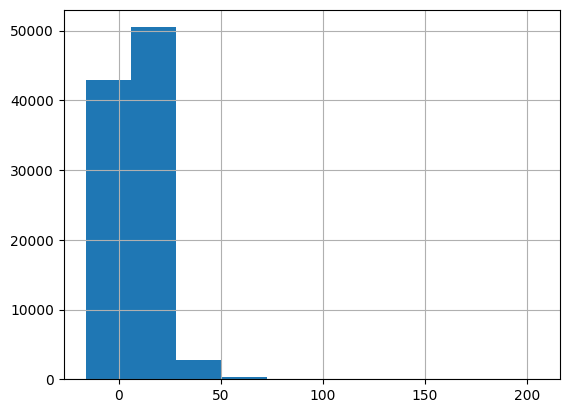

In [57]:
# Plot a histogram of the 'delivery_time' column from the `orders_df` DataFrame.
# The `hist()` function generates a visual representation of the distribution of delivery times,
# showing how frequently certain delivery time intervals occur.
# This allows us to quickly assess patterns, such as whether most orders are delivered on time,
# whether there are significant delays, or if there is a skew towards shorter or longer delivery times.
# By visualizing the distribution, we can gain insights into the overall delivery performance of the dataset.

orders_df.delivery_time.hist()

In [58]:
# Extract the 'customer_id' column values from the 'orders_df' DataFrame as a NumPy array
# This will allow us to easily check whether a customer has placed any orders by simply checking membership.
customer_id_in_orders_df = orders_df.customer_id.values

# Create a new 'status' column in the 'customers_df' DataFrame by applying a lambda function to the 'customer_id' column.
# The lambda function checks if a 'customer_id' from 'customers_df' exists in the 'customer_id_in_orders_df' array.
# If the customer ID is found in the orders data, they are considered "Active".
# Otherwise, they are marked as "Non Active".
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")

# Display a random sample of 5 rows from the 'customers_df' DataFrame to check the 'status' column and other details.
# This allows us to verify that the 'status' assignment worked as expected.
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
87439,7ecbbee802d80c24f32bf5945c1ea36e,1a54175bdbc674ec5680a51c640d4aed,4428,sao paulo,SP,Active
17372,a39ca7ad9e2c9764304c259ada2fd741,781af8401170fa56c03f5836d4fa3af1,6663,itapevi,SP,Active
57120,40b0a541aebe1001973a84d4109de91c,2f1285ef465dd07f5dce44b512e20759,22250,rio de janeiro,RJ,Active
187,46c6a82294d359a290ff408b11cbb643,1605a6c5d93d3488fb621c5323930795,22251,rio de janeiro,RJ,Active
6657,dbde531e9881f7b5ca69da3d8eea788f,999c2da896c0a7e316253dd8b876242b,3058,sao paulo,SP,Active


In [59]:
customers_df.groupby(by="status").customer_id.count()


,customer_id
status,
Active,99441


Visualization & Explanatory Analysis

In [60]:
# Perform a left merge between the 'customers_df' DataFrame (left) and the 'orders_df' DataFrame (right).
# The 'left_on' and 'right_on' parameters specify that the merge should be based on the 'customer_id' column from both DataFrames.
# A left join ensures that all records from the 'customers_df' DataFrame will be kept, and any matching records from the 'orders_df' will be added.
# If there are no matching records in 'orders_df' for a 'customer_id', the result will have NaN for the corresponding columns from 'orders_df'.
cust_orders_df = pd.merge(
    left=customers_df,  # The left DataFrame, containing customer information
    right=orders_df,    # The right DataFrame, containing order information
    how="left",         # Perform a left join, keeping all rows from 'customers_df'
    left_on="customer_id",  # Merge using the 'customer_id' column from 'customers_df'
    right_on="customer_id"  # Merge using the 'customer_id' column from 'orders_df'
)

# Display the first 5 rows of the resulting merged DataFrame to inspect how the customer and order information has been combined.
# This allows us to verify that the merge worked as expected and to check the contents of the merged data.
cust_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,14.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10.0


In [61]:
# Group the 'cust_orders_df' DataFrame by the 'customer_city' column. This will group the data based on each unique city.
# For each group (i.e., each city), we calculate the number of unique 'order_id' values using 'nunique()'.
# This gives us the number of distinct orders placed by customers in each city.
# After calculating the unique order counts per city, we sort the results in descending order using 'sort_values(ascending=False)'.
# This means that cities with the highest number of unique orders will appear first.
# Finally, we use 'head(10)' to return only the top 10 cities with the most unique orders.
# This helps identify which cities have the highest order volume and can provide insights into regional customer activity.

cust_orders_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
campinas,1444
porto alegre,1379
salvador,1245
guarulhos,1189


In [62]:
# Group the data by 'customer_state', count the number of unique 'order_id' values for each state,
# sort the result in descending order, and display the top 10 states with the most unique orders.
cust_orders_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


In [63]:
# Group the data by 'customer_zip_code_prefix', count the number of unique 'order_id' values for each zip code prefix,
# sort the result in descending order, and display the top 10 zip code prefixes with the most unique orders.
cust_orders_df.groupby(by="customer_zip_code_prefix").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
customer_zip_code_prefix,
22790,142
24220,124
22793,121
24230,117
22775,110
29101,101
13212,95
35162,93
22631,89


In [64]:
# Group the data by 'order_status', count the number of unique 'order_id' values for each order status,
# sort the result in descending order, and display the top 10 order statuses with the most unique orders.
cust_orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [65]:
# Perform a left merge between the 'order_payments' DataFrame (left) and the 'order_reviews' DataFrame (right).
# The merge is performed based on the 'order_id' column, which is present in both DataFrames.
# A left join ensures that all records from the 'order_payments' DataFrame are kept, and any matching records from 'order_reviews' are added.
# If there are no matching records in 'order_reviews' for a given 'order_id', the result will contain NaN for the columns from 'order_reviews'.
order_payrev_df = pd.merge(
    left=order_payments,  # The left DataFrame containing payment information
    right=order_reviews,  # The right DataFrame containing order review information
    how="left",           # Perform a left join, keeping all rows from 'order_payments'
    left_on="order_id",   # Merge based on 'order_id' from the 'order_payments' DataFrame
    right_on="order_id"   # Merge based on 'order_id' from the 'order_reviews' DataFrame
)

# Display the first 5 rows of the resulting merged DataFrame to inspect how the payment and review information have been combined.
order_payrev_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,no comment,no comment,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,no comment,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,no comment,no comment,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,no comment,no comment,2017-12-21,2017-12-22 01:10:39


In [66]:
# Group the data by 'payment_type', count the number of unique 'order_id' values for each payment type,
# sort the result in descending order, and display the top 10 payment types with the most unique orders.
order_payrev_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


In [67]:
# Sort the 'order_payrev_df' DataFrame by the 'payment_value' column in descending order.
# This will reorder the rows so that the highest payment values appear first.
# This helps to identify the orders with the highest payment amounts.
order_payrev_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,no comment,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,Entrega incompleta,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27,2018-07-28 02:36:10
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,no comment,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04,2017-03-04 21:40:41
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaT,NaT
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,no comment,no comment,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...,...
78326,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,no comment,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
51581,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,Produto Avariado,Recebi o Diario do Bebê c um pequeno rasgo na ...,2018-08-17,2018-08-18 15:32:40
37030,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,no comment,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
94953,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00,b54d02f7f1520b3995f84b77ab0dacb3,1.0,Péssima meu produtdefeito,no comment,2018-08-24,2018-08-25 02:24:54


In [68]:
# Group the 'order_payrev_df' DataFrame by the 'payment_type' column.
# For each payment type, calculate:
# - the number of unique 'order_id' values (using 'nunique'), which gives the count of distinct orders per payment type.
# - the minimum 'payment_value' (using 'min'), which shows the lowest payment value for each payment type.
# - the maximum 'payment_value' (using 'max'), which shows the highest payment value for each payment type.
# The result provides an overview of the distribution of payment values and the number of orders for each payment type.
order_payrev_df.groupby(by="payment_type").agg({
    "order_id": "nunique",          # Count of unique orders for each payment type
    "payment_value": ["min", "max"] # Minimum and maximum payment values for each payment type
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

#### Merge cust_orders_df & order_payrev

In [69]:
# Perform a left merge between the 'cust_orders_df' DataFrame (left) and the 'order_payrev_df' DataFrame (right).
# The merge is based on the 'order_id' column, which is present in both DataFrames.
# A left join ensures that all records from the 'cust_orders_df' are kept, and any matching records from 'order_payrev_df' are added.
# If there are no matching records in 'order_payrev_df' for a given 'order_id', the result will contain NaN for the columns from 'order_payrev_df'.
customers_df = pd.merge(
    left=cust_orders_df,    # Left DataFrame containing customer order information
    right=order_payrev_df,  # Right DataFrame containing order payment and review information
    how="left",             # Perform a left join, keeping all rows from 'cust_orders_df'
    left_on="order_id",     # Merge based on 'order_id' from the 'cust_orders_df'
    right_on="order_id"     # Merge based on 'order_id' from the 'order_payrev_df'
)

# Display the first 5 rows of the resulting merged DataFrame to inspect how the customer, order, and payment data have been combined.
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,no comment,no comment,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,no comment,no comment,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,no comment,no comment,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,no comment,no comment,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


### Explore order_items & sellers_df

#### Merge order_items & sellers_df

In [70]:
# Perform a left merge between the 'order_items' DataFrame (left) and the 'sellers_df' DataFrame (right).
# The merge is performed based on the 'seller_id' column, which is present in both DataFrames.
# A left join ensures that all records from the 'order_items' DataFrame are kept, and any matching records from the 'sellers_df' are added.
# If there are no matching records in 'sellers_df' for a given 'seller_id', the result will contain NaN for the columns from 'sellers_df'.
item_seller_df = pd.merge(
    left=order_items,  # Left DataFrame containing order item information
    right=sellers_df,  # Right DataFrame containing seller information
    how="left",        # Perform a left join, keeping all rows from 'order_items'
    left_on="seller_id",  # Merge based on 'seller_id' from the 'order_items'
    right_on="seller_id"  # Merge based on 'seller_id' from the 'sellers_df'
)

# Display the first 5 rows of the resulting merged DataFrame to inspect how the order item and seller information has been combined.
item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [71]:
# Group the data by 'seller_city', count the number of unique 'seller_id' values for each city,
# sort the result in descending order, and display the top 10 cities with the most unique sellers.
item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
guarulhos,50
ibitinga,49
santo andre,45
campinas,41


### Explore products_df & product_category
#### Merge products_df & product_category

In [72]:
# Perform a left merge between the 'products_df' DataFrame (left) and the 'product_category' DataFrame (right).
# The merge is based on the 'product_category_name' column, which is present in both DataFrames.
# A left join ensures that all records from the 'products_df' are kept, and any matching records from 'product_category' are added.
# If there are no matching records in 'product_category' for a given 'product_category_name', the result will contain NaN for the columns from 'product_category'.
product_df = pd.merge(
    left=products_df,       # Left DataFrame containing product information
    right=product_category, # Right DataFrame containing product category details
    how="left",             # Perform a left join, keeping all rows from 'products_df'
    left_on="product_category_name", # Merge based on 'product_category_name' from 'products_df'
    right_on="product_category_name" # Merge based on 'product_category_name' from 'product_category'
)

# Display the first 5 rows of the resulting merged DataFrame to inspect how the product and category information has been combined.
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [73]:
# Group the data by 'product_category_name', count the number of unique 'product_id' values for each category,
# sort the result in descending order, and display the top 10 product categories with the most unique products.
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
automotivo,1900
informatica_acessorios,1639
brinquedos,1411
relogios_presentes,1329


In [74]:
# Group the data by 'product_category_name_english', count the number of unique 'product_id' values for each category,
# sort the result in descending order, and display the top 10 product categories (in English) with the most unique products.
product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
auto,1900
computers_accessories,1639
toys,1411
watches_gifts,1329


#### Merge item_seller_df & product_df

In [75]:
# Perform a left merge between the 'product_df' DataFrame (left) and the 'item_seller_df' DataFrame (right).
# The merge is based on the 'product_id' column, which is present in both DataFrames.
# A left join ensures that all records from the 'product_df' are kept, and any matching records from 'item_seller_df' are added.
# If there are no matching records in 'item_seller_df' for a given 'product_id', the result will contain NaN for the columns from 'item_seller_df'.
sellers_df = pd.merge(
    left=product_df,       # Left DataFrame containing product and category information
    right=item_seller_df,  # Right DataFrame containing order item and seller information
    how="left",            # Perform a left join, keeping all rows from 'product_df'
    left_on="product_id",  # Merge based on 'product_id' from the 'product_df'
    right_on="product_id"  # Merge based on 'product_id' from the 'item_seller_df'
)

# Display the first 5 rows of the resulting merged DataFrame to inspect how the product and seller information has been combined.
sellers_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [76]:
# Sort the 'sellers_df' DataFrame by the 'price' column in descending order.
# This will reorder the rows so that the highest prices appear first, allowing us to see the products with the highest prices.
sellers_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
73922,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
49503,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
71835,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
32232,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55911,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,11,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
55903,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,3,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
29610,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG
29608,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,38950,ibia,MG


In [77]:
# Group the 'sellers_df' DataFrame by 'product_category_name_english' (English product category names).
# For each category, calculate:
# - the number of unique 'order_id' values (using 'nunique'), which gives the count of distinct orders per category.
# - the minimum 'price' (using 'min'), which shows the lowest price for products in each category.
# - the maximum 'price' (using 'max'), which shows the highest price for products in each category.
# This provides insights into the distribution of prices and the number of orders within each product category.
sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",     # Count of unique orders per product category
    "price": ["min", "max"]    # Minimum and maximum prices within each product category
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

### Explore geolocation_df

In [78]:
geolocation_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
24626,2230,-23.485076,-46.562957,sao paulo,SP
194286,7920,-23.257531,-46.745331,francisco morato,SP
539658,29745,-19.143027,-40.622402,sao domingos do norte,ES
535847,29316,-20.773362,-41.160869,cachoeiro de itapemirim,ES
755827,65074,-2.510921,-44.258353,sao luis,MA


In [79]:
# Define a function 'pretty_string' that takes a column name (or string) as input and returns a cleaned-up version.
# The function performs the following operations:
# 1. 'column.split()' splits the string by whitespace, removing any extra spaces (multiple spaces are reduced to one).
# 2. ' 'join(column.split())' then joins the words back together with a single space, normalizing the spacing.
# 3. 'column_space.lower()' converts all characters in the string to lowercase for consistency.
# 4. 'unidecode.unidecode(column_space)' removes any accents or special characters, converting them to their closest ASCII equivalents.
# This function is useful for cleaning up column names or text data, making them consistent and easier to work with (especially for comparisons or matching).
def pretty_string(column):
    column_space = ' '.join(column.split())  # Normalize spacing by splitting and rejoining the words with single spaces
    return unidecode.unidecode(column_space.lower())  # Convert to lowercase and remove accents/special characters

In [80]:
# Apply the 'pretty_string' function to the 'geolocation_city' column in the 'geolocation_df' DataFrame.
# This will clean up the city names by:
# 1. Normalizing spaces (removing extra spaces between words),
# 2. Converting all characters to lowercase,
# 3. Removing any accents or special characters to standardize the text.
# The cleaned-up city names will then be stored back into the 'geolocation_city' column.
geolocation_df['geolocation_city'] = geolocation_df['geolocation_city'].apply(pretty_string)

In [81]:
# Group the 'geolocation_df' DataFrame by 'geolocation_zip_code_prefix', which represents the first few digits of the zip code.
# Use the 'size()' function to count the number of occurrences (rows) for each zip code prefix.
# Then, sort the result in descending order using 'sort_values(ascending=False)'.
# This will display the most frequent zip code prefixes at the top, helping to identify which zip code prefixes are most common in the data.
geolocation_df.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

,0
geolocation_zip_code_prefix,
24220,1146
24230,1102
38400,965
35500,907
11680,879
...,...
20056,1
76370,1
63012,1


In [82]:
# Filter the 'geolocation_df' DataFrame to select rows where the 'geolocation_zip_code_prefix' is equal to 24220.
# This will display all the records (up to 5 rows by default) that belong to the zip code prefix 24220.
# The 'head()' function is used to show the first few records of the filtered data, allowing us to inspect the entries with this specific zip code prefix.
geolocation_df[geolocation_df['geolocation_zip_code_prefix'] == 24220].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470805,24220,-22.905817,-43.106989,niteroi,RJ
470811,24220,-22.902306,-43.112545,niteroi,RJ
470812,24220,-22.904567,-43.110491,niteroi,RJ
470820,24220,-22.902575,-43.109192,niteroi,RJ
470821,24220,-22.907500,-43.106170,niteroi,RJ


### Explore The Whole Data
#### Merge The Whole Data

In [83]:
# Perform a left merge between the 'customers_df' DataFrame (left) and the 'sellers_df' DataFrame (right).
# The merge is based on the 'order_id' column, which is present in both DataFrames.
# A left join ensures that all records from the 'customers_df' DataFrame are kept, and any matching records from 'sellers_df' are added.
# If there are no matching records in 'sellers_df' for a given 'order_id', the result will contain NaN for the columns from 'sellers_df'.
all_data = pd.merge(
    left=customers_df,  # Left DataFrame containing customer information
    right=sellers_df,   # Right DataFrame containing seller information
    how="left",         # Perform a left join, keeping all rows from 'customers_df'
    left_on="order_id", # Merge based on 'order_id' from the 'customers_df'
    right_on="order_id" # Merge based on 'order_id' from the 'sellers_df'
)

# Display the first 5 rows of the resulting merged DataFrame to inspect how the customer and seller information has been combined.
all_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   status                         119143 non-null  object        
 6   order_id                       119143 non-null  object        
 7   order_status                   119143 non-null  object        
 8   order_purchase_timestamp       119143 non-null  datetime64[ns]
 9   order_approved_at              118966 non-null  datetime64[ns]
 10  order_delivered_carrier_date   117057 non-null  datetime64[ns]
 11  

In [85]:
all_data.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          18.38
                    cool_stuff                     199.00          20.63
                    sports_leisure                 120.00          15.59
abadiania           small_appliances               949.99          75.53
abaete              baby                            65.00          17.70
...                                                   ...            ...
ze doca             food_drink                      65.00          38.00
                    garden_tools                    39.90          26.61
                    musical_instruments            359.00          49.04
                    sports_leisure                 149.90          38.60
zortea              computers_accessories           69.90          20.98

[25199 rows x 2 columns]

In [86]:
all_data.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_state product_category_name_english                        
AC             auto                            606.97         146.42
               baby                            697.84         174.13
               bed_bath_table                  567.70         157.51
               books_general_interest          633.80         123.71
               christmas_supplies               69.90          60.95
...                                               ...            ...
TO             sports_leisure                 5533.32        1393.53
               stationery                      276.80          73.80
               telephony                      1268.12         627.34
               toys                           1864.15         423.96
               watches_gifts                  5446.89         950.02

[1356 rows x 2 columns]

In [87]:
all_data.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,41746,7726078.35
RJ,12852,2795615.67
MG,11635,2351221.09
RS,5466,1160175.66
PR,5045,1079795.49
BA,3380,805070.98
SC,3637,801276.45
GO,2020,520481.65
DF,2140,438095.32


In [88]:
all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         182          1.0  5.0
air_conditioning                   253          1.0  5.0
art                                202          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              350          1.0  5.0
...                                ...          ...  ...
stationery                        2311          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4199          1.0  5.0
toys                              3886          1.0  5.0
watches_gifts                     5624          1.0  5.0

[71 rows x 3 columns]

### Convert all_data to .csv

In [89]:
all_data.to_csv('all_data.csv', index=False)

## Visualization & Explanatory Analysis

### Which products are the most and least sold?

In [90]:
# Group the 'all_data' DataFrame by 'product_category_name_english', counting the number of occurrences of 'product_id' in each product category.
# The 'count()' function calculates the number of products in each category.
# 'reset_index()' is used to convert the resulting Series back into a DataFrame and reassign the index.
sum_order_items_df = all_data.groupby("product_category_name_english")["product_id"].count().reset_index()

# Rename the 'product_id' column to 'products' to better reflect that this column represents the number of products in each category.
sum_order_items_df = sum_order_items_df.rename(columns={"product_id": "products"})

# Sort the DataFrame by the 'products' column in descending order, so the categories with the most products are at the top.
sum_order_items_df = sum_order_items_df.sort_values(by="products", ascending=False)

# Keep only the top 10 product categories with the highest number of products.
sum_order_items_df = sum_order_items_df.head(10)

# Display the first 5 rows of the resulting DataFrame, which now shows the top 10 product categories based on the number of products.
sum_order_items_df.head()

,product_category_name_english,products
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150


<ipython-input-91-4a7133998e76>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="products", y="product_category_name_english", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn

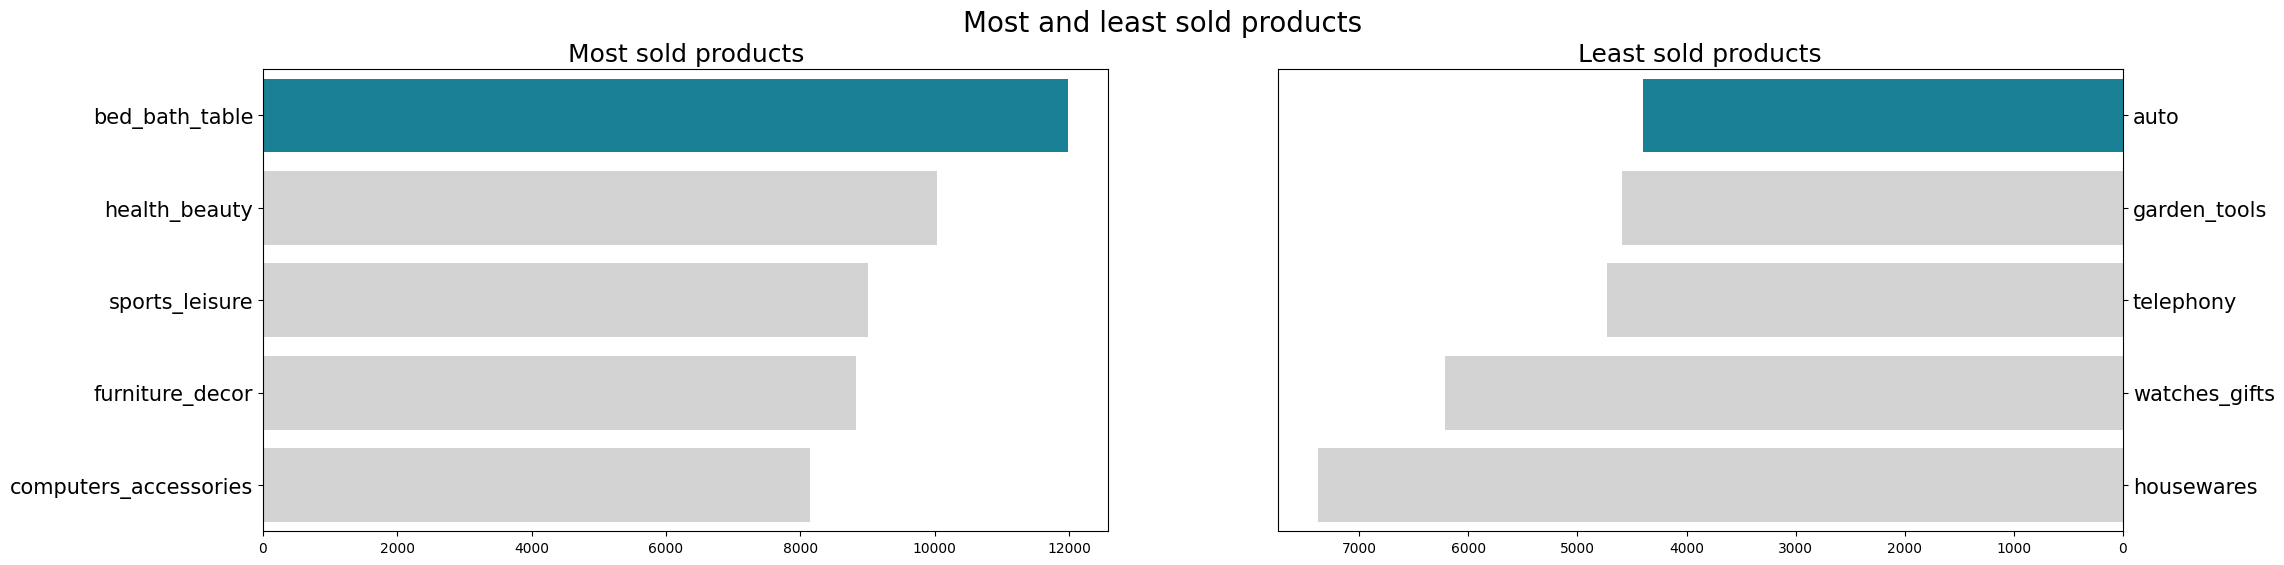

In [91]:
# Create a figure with 1 row and 2 columns (subplots), with a figure size of 24x6 inches.
# The figure will display two plots side by side for visual comparison.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Define a custom color palette for the bars. The first color will highlight the most sold category,
# while the rest of the bars are given a gray color to focus attention on the first bar.
colors = ["#068DA9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Plot a bar chart for the top 5 most sold product categories, based on the 'products' column.
# The x-axis represents the number of products, and the y-axis represents product categories (in English).
sns.barplot(x="products", y="product_category_name_english", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)  # Remove the y-axis label for the first subplot (the product categories are already on the y-axis).
ax[0].set_xlabel(None)  # Remove the x-axis label for the first subplot (no need to label the number of products).
ax[0].set_title("Most sold products", loc="center", fontsize=18)  # Set the title for the first subplot.
ax[0].tick_params(axis ='y', labelsize=15)  # Adjust the y-axis tick label size for better readability.

# Plot a bar chart for the bottom 5 least sold product categories, sorting the data by 'products' in ascending order.
# The x-axis represents the number of products, and the y-axis represents product categories (in English).
sns.barplot(x="products", y="product_category_name_english", data=sum_order_items_df.sort_values(by="products", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)  # Remove the y-axis label for the second subplot.
ax[1].set_xlabel(None)  # Remove the x-axis label for the second subplot.
ax[1].invert_xaxis()  # Invert the x-axis to display the lowest values on the left.
ax[1].yaxis.set_label_position("right")  # Move the y-axis labels to the right side of the second subplot.
ax[1].yaxis.tick_right()  # Display the y-axis ticks on the right side.
ax[1].set_title("Least sold products", loc="center", fontsize=18)  # Set the title for the second subplot.
ax[1].tick_params(axis='y', labelsize=15)  # Adjust the y-axis tick label size for better readability.

# Set the overall title for the entire figure, centered at the top with a font size of 20.
plt.suptitle("Most and least sold products", fontsize=20)

# Display the figure with the two subplots.
plt.show()

###  What is the total amount spent by customers in recent months?

In [92]:
# Resample the data on a monthly basis using the 'order_approved_at' column as the reference for the time period.
# Aggregate the data by counting the number of unique order_ids per month.
# The result will give us the number of orders approved per month.
monthly_df = all_data.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",  # Count unique order IDs per month to get the total number of orders.
})

# Format the index (which is currently a datetime index) to show only the month name (e.g., 'January', 'February').
# The new format is 'Month' (e.g., 'January', 'February') for readability.
monthly_df.index = monthly_df.index.strftime('%B')

# Reset the index of the DataFrame to move the month names (which were the index) into a regular column.
# This ensures the DataFrame has a default integer index, and the month names are now a column.
monthly_df = monthly_df.reset_index()

# Rename the 'order_id' column to 'order_count' for better clarity and readability.
# This change makes it more explicit that this column represents the count of orders in each month.
monthly_df.rename(columns={
    "order_id": "order_count",
}, inplace=True)

# Display the first few rows of the DataFrame (the top 5 rows) to inspect the result.
monthly_df.head()

<ipython-input-92-44e4795821eb>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = all_data.resample(rule='M', on='order_approved_at').agg({


,order_approved_at,order_count
0,September,1
1,October,320
2,November,0
3,December,1
4,January,760


In [93]:
# Sort the 'monthly_df' DataFrame by 'order_count' in ascending order to arrange the rows by the number of orders.
# After sorting, drop duplicate values based on the 'order_approved_at' column, keeping only the last occurrence for each unique date.
# This ensures that for each 'order_approved_at' date, only the row with the highest 'order_count' remains.
monthly_df = monthly_df.sort_values('order_count').drop_duplicates('order_approved_at', keep='last')

In [94]:
monthly_df.head()

,order_approved_at,order_count
12,September,4301
13,October,4590
15,December,5832
21,June,6164
22,July,6176


In [95]:
monthly_df.sort_values(by='order_count')

,order_approved_at,order_count
12,September,4301
13,October,4590
15,December,5832
21,June,6164
22,July,6176
23,August,6620
17,February,6706
19,April,6778
20,May,7066
16,January,7187


In [96]:
# Create a dictionary mapping month names to their corresponding numeric values.
# This will help convert month names (e.g., "January") into numeric values (e.g., 1) for easier sorting.
month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

# Map the 'order_approved_at' month names to their numeric equivalents using the 'month_mapping' dictionary.
# This adds a new column 'month_numeric' in the 'monthly_df' DataFrame with numeric values representing the months.
monthly_df["month_numeric"] = monthly_df["order_approved_at"].map(month_mapping)

# Sort the 'monthly_df' DataFrame by the 'month_numeric' column to arrange the months in chronological order.
monthly_df = monthly_df.sort_values("month_numeric")

# Drop the 'month_numeric' column as it was only needed for sorting, and we no longer need it in the final DataFrame.
monthly_df = monthly_df.drop("month_numeric", axis=1)

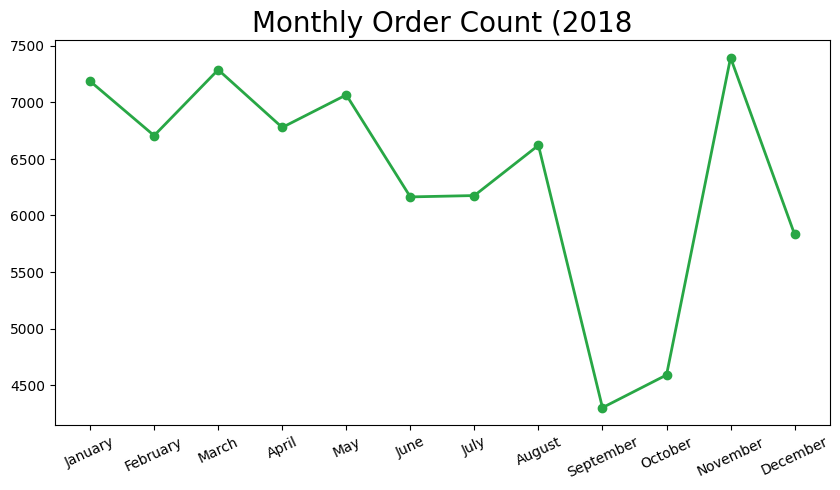

In [97]:
# Create a figure with a specific size: 10 inches wide and 5 inches tall.
plt.figure(figsize=(10, 5))

# Plot a line chart using the 'order_approved_at' column for the x-axis (months)
# and the 'order_count' column for the y-axis (number of orders).
# The line will have circular markers, a line width of 2, and a green color.
plt.plot(
    monthly_df["order_approved_at"],  # x-axis: the month names from the 'order_approved_at' column.
    monthly_df["order_count"],  # y-axis: the number of orders per month from the 'order_count' column.
    marker='o',  # Use circular markers for each data point.
    linewidth=2,  # Set the thickness of the line to 2 (default is 1).
    color="#28a745"  # Set the line color to green (#28a745).
)

# Set the title of the plot. The title is centered and has a font size of 20.
plt.title("Monthly Order Count (2018", loc="center", fontsize=20)

# Set the font size of the x-axis tick labels to 10 and rotate them by 25 degrees for better readability.
plt.xticks(fontsize=10, rotation=25)

# Set the font size of the y-axis tick labels to 10 for consistency and readability.
plt.yticks(fontsize=10)

# Display the plot.
plt.show()

### What is the sales trend on our e-commerce platform over time?

In [98]:
# Resample the 'all_data' DataFrame to a monthly frequency using the 'order_approved_at' column as the reference for the time period.
# The data is aggregated by summing the 'payment_value' for each month to get the total spend for that month.
monthly_spend_df = all_data.resample(rule='M', on='order_approved_at').agg({
    "payment_value": "sum"  # Sum up the 'payment_value' for each month, representing the total money spent.
})

# Convert the datetime index to display only the month name (e.g., 'January', 'February') for better readability.
# The format is changed from a numerical month to a string (e.g., 'January', 'February').
monthly_spend_df.index = monthly_spend_df.index.strftime('%B')

# Reset the DataFrame's index to move the month names (which were the index) into a regular column.
# This step makes the DataFrame easier to work with and provides a default integer-based index.
monthly_spend_df = monthly_spend_df.reset_index()

# Rename the 'payment_value' column to 'total_spend' for clarity and better description.
# This makes it explicit that this column represents the total amount of money spent each month.
monthly_spend_df.rename(columns={
    "payment_value": "total_spend",
}, inplace=True)

# Display the first few rows (top 5) of the 'monthly_spend_df' DataFrame to inspect the results.
monthly_spend_df.head()

<ipython-input-98-0db327127d38>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_spend_df = all_data.resample(rule='M', on='order_approved_at').agg({


,order_approved_at,total_spend
0,September,0.00
1,October,75985.54
2,November,0.00
3,December,19.62
4,January,182178.36


In [99]:
# Sorting the 'monthly_spend_df' DataFrame based on the 'total_spend' column in ascending order
# and removing duplicate rows based on the 'order_approved_at' column while keeping the last occurrence for each unique date.
monthly_spend_df = monthly_spend_df.sort_values('total_spend').drop_duplicates('order_approved_at', keep='last')

In [100]:
monthly_spend_df.head()

,order_approved_at,total_spend
12,September,927821.13
15,December,1092932.59
13,October,1138730.07
23,August,1268960.54
21,June,1306785.03


In [101]:
monthly_spend_df.sort_values(by='total_spend')

,order_approved_at,total_spend
12,September,927821.13
15,December,1092932.59
13,October,1138730.07
23,August,1268960.54
21,June,1306785.03
17,February,1314882.87
22,July,1334156.42
16,January,1406557.66
19,April,1476502.25
18,March,1500474.01


In [102]:
# Map the 'order_approved_at' month names to their numeric equivalents using the 'month_mapping' dictionary.
# This adds a new column 'month_numeric' in the 'monthly_spend_df' DataFrame with numeric values representing the months.
monthly_spend_df["month_numeric"] = monthly_spend_df["order_approved_at"].map(month_mapping)

# Sort the 'monthly_spend_df' DataFrame by the 'month_numeric' column to arrange the months in chronological order.
monthly_spend_df = monthly_spend_df.sort_values("month_numeric")

# Drop the 'month_numeric' column as it was only needed for sorting, and we no longer need it in the final DataFrame.
monthly_spend_df = monthly_spend_df.drop("month_numeric", axis=1)

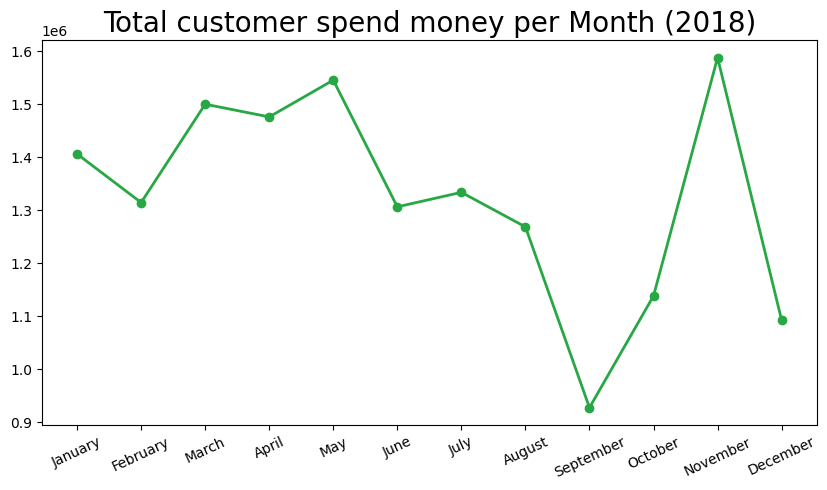

In [103]:
# Create a figure with a specific size: 10 inches wide and 5 inches tall, suitable for displaying the plot.
plt.figure(figsize=(10, 5))

# Plot a line chart using the 'order_approved_at' column for the x-axis (months)
# and the 'total_spend' column for the y-axis (total money spent per month).
# The line will have circular markers, a line width of 2, and a custom green color.
plt.plot(
    monthly_spend_df["order_approved_at"],  # x-axis: the month names from the 'order_approved_at' column.
    monthly_spend_df["total_spend"],  # y-axis: the total money spent per month from the 'total_spend' column.
    marker='o',  # Use circular markers for each data point.
    linewidth=2,  # Set the thickness of the line to 2 (default is 1).
    color="#28a745"  # Set the line color to a specific shade of green (#28a745).
)

# Set the title of the plot. The title is centered and has a font size of 20.
plt.title("Total customer spend money per Month (2018)", loc="center", fontsize=20)

# Set the font size of the x-axis tick labels to 10 and rotate them by 25 degrees for better readability.
plt.xticks(fontsize=10, rotation=25)

# Set the font size of the y-axis tick labels to 10 for consistency and readability.
plt.yticks(fontsize=10)

# Display the plot.
plt.show()

### What is the level of customer satisfaction with our services?

<ipython-input-104-4d1c3e17990e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tu

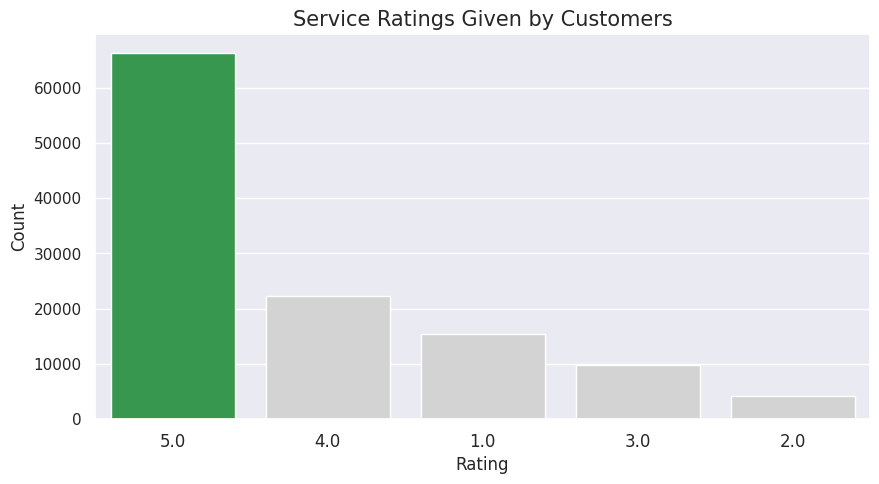

In [104]:
# Count the occurrences of each review score in the 'review_score' column and sort them in descending order.
review_scores = all_data['review_score'].value_counts().sort_values(ascending=False)

# Get the most common review score (the one with the highest count).
most_common_score = review_scores.idxmax()

# Set the style of the Seaborn plot to "darkgrid" for a more modern and readable grid background.
sns.set(style="darkgrid")

# Create a figure for the bar plot with a size of 10 inches wide and 5 inches tall.
plt.figure(figsize=(10, 5))

# Create a bar plot using Seaborn. The x-axis represents the review scores,
# and the y-axis represents the number of occurrences of each score.
# The color is set to green (#28a745) for the most common score, and gray (#D3D3D3) for others.
sns.barplot(
    x=review_scores.index,  # The review scores.
    y=review_scores.values,  # The counts for each review score.
    order=review_scores.index,  # Ensure the bars are ordered by review scores.
    palette=["#28a745" if score == most_common_score else "#D3D3D3" for score in review_scores.index]  # Color most common score green and others gray.
)

# Set the title of the plot, specifying the font size to be 15.
plt.title("Service Ratings Given by Customers", fontsize=15)

# Set the x-axis label to "Rating".
plt.xlabel("Rating")

# Set the y-axis label to "Count".
plt.ylabel("Count")

# Set the font size of the x-axis labels to 12 for readability.
plt.xticks(fontsize=12)

# Show the plot.
plt.show()

### What is the demographic profile of our customers, and are there any differences in purchase preferences among different groups?

#### Berdasarkan customer_state


In [105]:
# Grouping the 'all_data' DataFrame by 'customer_state' and counting the number of unique 'customer_id' in each state.
# This returns the number of customers in each state.
bystate_df = all_data.groupby(by="customer_state").customer_id.nunique().reset_index()

# Renaming the 'customer_id' column to 'customer_count' for clarity, as this column represents the number of customers in each state.
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

# Displaying the first 5 rows of the 'bystate_df' DataFrame to verify the transformation.
bystate_df.head()

,customer_state,customer_count
0,AC,81
1,AL,413
2,AM,148
3,AP,68
4,BA,3380


In [106]:
# Sample code to create 'bystate_df' if not already defined
# Assuming 'all_data' has a 'customer_state' column, we group by 'customer_state' and count the customers

bystate_df = all_data.groupby('customer_state').size().reset_index(name='customer_count')


<ipython-input-107-2e779060c28b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tu

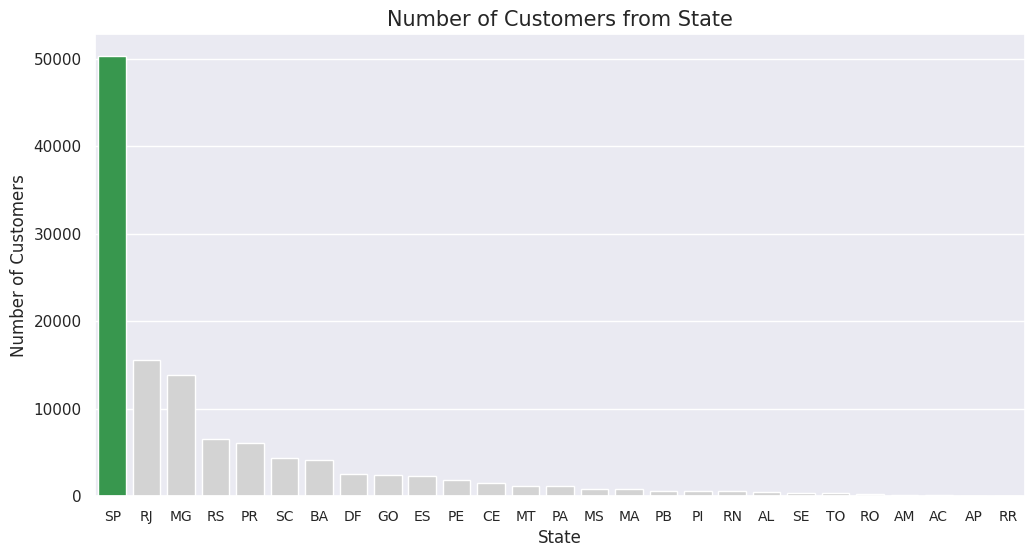

In [107]:
plt.figure(figsize=(12, 6))

# Identify the most common state (the state with the highest customer count).
most_common_state = bystate_df.loc[bystate_df['customer_count'].idxmax(), 'customer_state']

# Sort the DataFrame by 'customer_count' in descending order to have the highest states at the top.
bystate_df = bystate_df.sort_values(by='customer_count', ascending=False)

# Create a bar plot using Seaborn. Highlight the most common state in green and others in gray.
sns.barplot(
    x='customer_state',  # The x-axis will display states.
    y='customer_count',  # The y-axis will display customer counts.
    data=bystate_df,  # Data for plotting
    palette=["#28a745" if state == most_common_state else "#D3D3D3" for state in bystate_df['customer_state']]  # Color most common state in green, others in gray.
)

# Set title and labels.
plt.title("Number of Customers from State", fontsize=15)
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.xticks(fontsize=10)  # Set x-axis tick label font size.
plt.show()

<ipython-input-108-471f05380d99>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tu

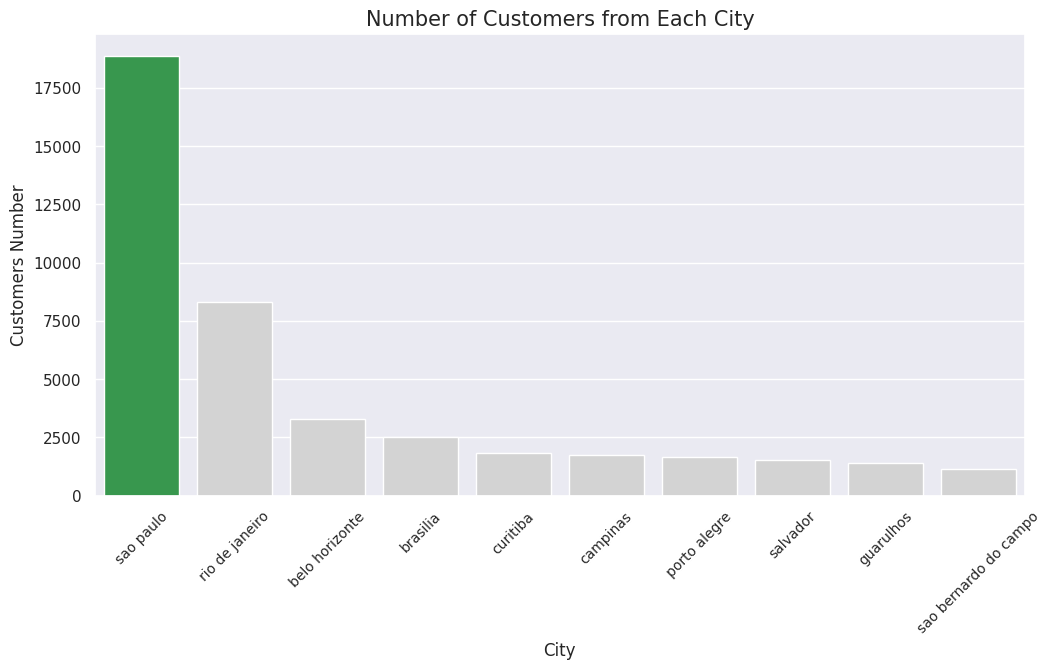

In [108]:
# Count the occurrences of each 'customer_city' in the 'all_data' DataFrame and select the top 10 cities with the highest counts.
bycity_df = all_data['customer_city'].value_counts().head(10)

# Create a figure with a size of 12 inches wide and 6 inches tall.
plt.figure(figsize=(12, 6))

# Identify the most common city by finding the city with the maximum customer count.
most_common_city = bycity_df.idxmax()

# Sort the DataFrame by the 'customer_city' count in descending order, so the cities with the most customers appear first.
bycity_df = bycity_df.sort_values(ascending=False)

# Create a bar plot using Seaborn. The x-axis represents the city names, and the y-axis represents the number of customers.
# The color is set to green for the most common city, and gray for all other cities.
sns.barplot(
    x=bycity_df.index,  # x-axis: the city names from the 'customer_city' column.
    y=bycity_df.values,  # y-axis: the number of customers in each city.
    palette=["#28a745" if city == most_common_city else "#D3D3D3" for city in bycity_df.index]  # Set color: green for the most common city, gray for others.
)

# Set the title of the plot with a font size of 15.
plt.title("Number of Customers from Each City", fontsize=15)

# Set the x-axis label to 'City'.
plt.xlabel("City")

# Set the y-axis label to 'Number of Customers'.
plt.ylabel("Customers Number")

# Rotate the x-axis tick labels by 45 degrees for better readability and set the font size to 10.
plt.xticks(rotation=45, fontsize=10)

# Show the plot.
plt.show()

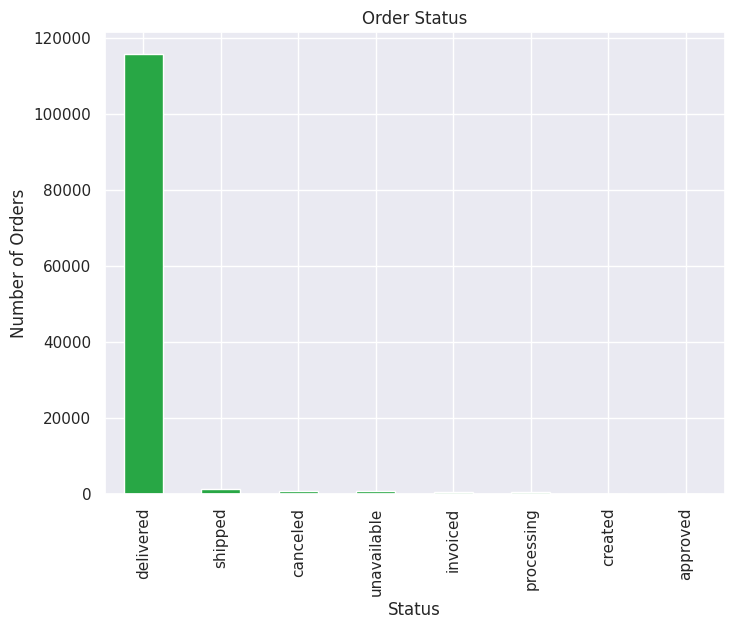

In [113]:
# Count the occurrences of each 'order_status' in the 'all_data' DataFrame using value_counts().
# This will return the number of orders for each status (e.g., 'delivered', 'shipped', 'canceled').
order_status_counts = all_data['order_status'].value_counts()

# Create a figure with a size of 8 inches wide and 6 inches tall to display the bar chart.
plt.figure(figsize=(8, 6))

# Plot a bar chart using the 'order_status_counts' data, with the bars colored in 'green'.
# The x-axis represents the 'order_status', and the y-axis represents the number of orders for each status.
order_status_counts.plot(kind='bar', color='#28a745')  # Changed color to green (#28a745)

# Set the title of the plot to 'Order Status'.
plt.title('Order Status')

# Set the x-axis label to 'Status', representing the different order statuses.
plt.xlabel('Status')

# Set the y-axis label to 'Number of Orders', representing the number of orders for each status.
plt.ylabel('Number of Orders')

# Display the plot.
plt.show()

### In which geographic regions do we have the highest number of customers?


In [117]:
# Group the 'geo_df' DataFrame by 'geolocation_zip_code_prefix' and count the number of unique 'geolocation_state' per zip code.
# The 'reset_index()' method is used to convert the result into a DataFrame, and 'name="count"' assigns the name 'count' to the new column.
other_state_geolocation = geolocation_df.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')

# Filter the result to only include zip codes where the number of unique states is greater than or equal to 2.
# This filters out zip codes that are associated with only one state.
# The 'shape' function returns the dimensions of the DataFrame (rows, columns), which helps check how many zip codes match this condition.
other_state_geolocation[other_state_geolocation['count'] >= 2].shape

# Group the 'geo_df' DataFrame by both 'geolocation_zip_code_prefix' and 'geolocation_state', and count the number of occurrences for each combination.
# 'size()' is used to count the number of records for each zip code and state combination.
# 'reset_index(name="count")' creates a new column 'count' with the resulting count.
# The 'drop_duplicates(subset="geolocation_zip_code_prefix")' method removes rows where the zip code is repeated.
# This ensures that only one entry per zip code is kept, based on the most frequent state (i.e., the state that appears first).
# Finally, the 'drop('count', axis=1)' removes the 'count' column from the final DataFrame.
max_state = geolocation_df.groupby(['geolocation_zip_code_prefix', 'geolocation_state']).size().reset_index(name='count').drop_duplicates(subset='geolocation_zip_code_prefix').drop('count', axis=1)

In [118]:
# Group the 'geo_df' DataFrame by 'geolocation_zip_code_prefix', 'geolocation_city', and 'geolocation_state'.
# For each group, compute the median values of the latitude ('geolocation_lat') and longitude ('geolocation_lng').
# The result is a DataFrame that shows the median latitude and longitude for each combination of zip code, city, and state.
# 'reset_index()' is used to convert the groupby result into a regular DataFrame with an index.
geolocation_silver = geolocation_df.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()

# Merge the 'geolocation_silver' DataFrame with 'max_state' DataFrame based on the common columns 'geolocation_zip_code_prefix' and 'geolocation_state'.
# The merge is done using an 'inner' join, which means only the rows that have matching values in both DataFrames will be included.
# The result is a DataFrame that combines the median latitude/longitude with the most common state for each zip code.
geolocation_silver = geolocation_silver.merge(max_state, on=['geolocation_zip_code_prefix', 'geolocation_state'], how='inner')

In [119]:
# Merge the 'customers_df' DataFrame with the 'geolocation_silver' DataFrame.
# The merge is done using an 'inner' join, meaning only rows with matching 'customer_zip_code_prefix'
# in the 'customers_df' and 'geolocation_silver' DataFrames will be included in the result.
# The merge uses 'customer_zip_code_prefix' from 'customers_df' and 'geolocation_zip_code_prefix' from 'geolocation_silver'
# as the key columns to match on.
customers_silver = customers_df.merge(
    geolocation_silver,                # The right DataFrame ('geolocation_silver') contains geolocation data with median lat/lng and the most common state.
    left_on='customer_zip_code_prefix',  # The key column in the left DataFrame ('customers_df') to match with the right DataFrame.
    right_on='geolocation_zip_code_prefix',  # The key column in the right DataFrame ('geolocation_silver') to match with the left DataFrame.
    how='inner'                         # Perform an inner join, so only the rows where there's a match in both DataFrames will be kept.
)

In [120]:
customers_silver.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,4.0,no comment,no comment,2017-05-26,2017-05-30 22:34:40,14409,franca,SP,-20.502070,-47.396822
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,5.0,no comment,no comment,2018-01-30,2018-02-10 22:43:29,9790,sao bernardo do campo,SP,-23.727299,-46.542631
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,5.0,no comment,no comment,2018-06-15,2018-06-15 12:10:59,1151,sao paulo,SP,-23.531294,-46.656404
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,5.0,no comment,no comment,2018-03-29,2018-04-02 18:36:47,8775,mogi das cruzes,SP,-23.497390,-46.182342
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52,13056,campinas,SP,-22.973309,-47.141530


In [121]:
customers_silver.to_csv("geolocation.csv", index=False)

In [122]:
# Define a function 'plot_brazil_map' that takes a DataFrame 'data' as input and plots a scatter plot on a map of Brazil.
def plot_brazil_map(data):
    # Load the Brazil map image from a URL and read it using 'mpimg.imread'.
    # This image will be used as the background for the scatter plot.
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')

    # Create a scatter plot using the 'data' DataFrame.
    # The longitude ('geolocation_lng') is plotted on the x-axis, and latitude ('geolocation_lat') is plotted on the y-axis.
    # Set the figure size to 10x10 inches, and make the points semi-transparent (alpha=0.3) with a very small size (s=0.3).
    # The color of the points is set to maroon.
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3, s=0.3, c='maroon')

    # Turn off the axis to make the map look cleaner without x and y ticks.
    plt.axis('off')

    # Overlay the Brazil map image as the background. The 'extent' parameter defines the coordinates for the image:
    # [min_longitude, max_longitude, min_latitude, max_latitude] to match the map's geographic bounds.
    plt.imshow(brazil, extent=[-73.98283055, -33.8, -33.75116944, 5.4])

    # Display the plot.
    plt.show()

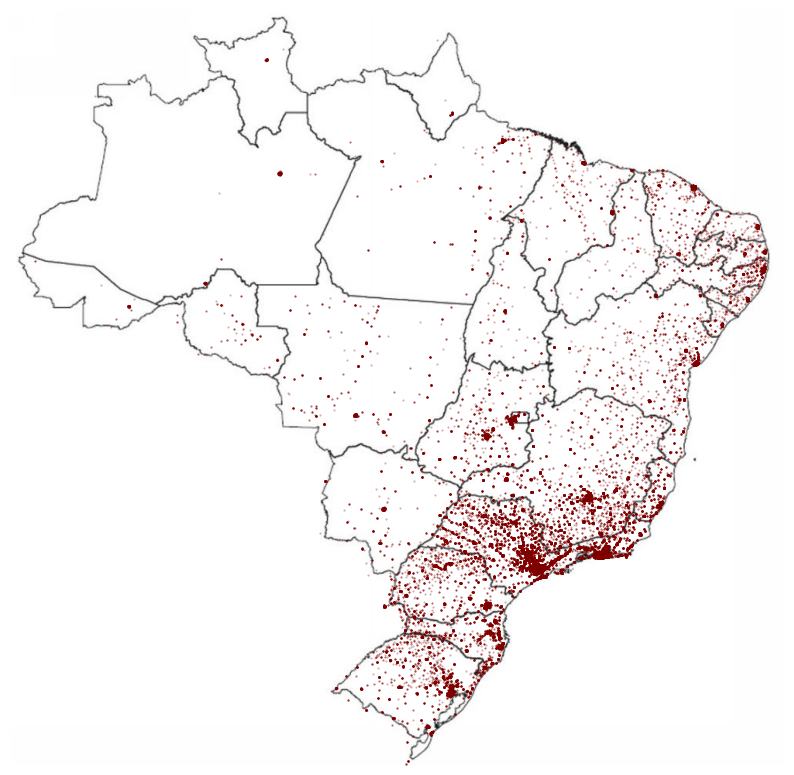

In [123]:
plot_brazil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))


Many customers come from southeastern and southern states.

## Conclusion

- Which products are the most and least sold?
> The visualization shows that customers most frequently purchase products from the "bed_bath_table" category, while the least sold products are from the "auto" category.
- How has the sales performance evolved over time on the e-commerce platform?
> Sales performance remained stable from January to May, with a slight decline from June to July. There was a minor increase in August, followed by a significant decline in September. However, there was a sharp rise in October and November, followed by another decrease in December.
- How much budget has been spent by customers in recent months?
> Based on the visualizations presented, as seen in the sales performance graph from the previous question, customer spending remained stable from January to May, experienced a decline from June to September, saw a significant increase in October and November, and then decreased again in December.
- What is the level of customer satisfaction with our services?
> Customer satisfaction with our services is very high, as the visualization clearly shows that the majority of customers gave a rating of 5, followed by a significant portion who gave a rating of 4.
- What is the customer demographic profile, and are there any differences in purchase preferences among them?
> The state with the highest number of customers is São Paulo (SP), which indicates that the city with the most customers is São Paulo, followed by Rio de Janeiro (RJ). The most common order status is "delivered," meaning that the items ordered by customers are delivered successfully without any issues, which is also reflected in the high customer satisfaction ratings (especially the 5-star ratings for the e-commerce service).
- Which geographic locations have the highest number of customers?
> According to the generated graph, the majority of customers are located in the southeastern and southern regions of Brazil. Additionally, there are more customers in cities that are capitals (São Paulo, Rio de Janeiro, Porto Alegre, etc.).